### Atividade 1 - Quant
### Parte 1
Vamos começar importando o arquivo `Porfolios_retornos_diarios.csv` e calcular 

- Volatilidade anualizada de cada carteira
- Retorno anual


In [126]:
import pandas as pd
import numpy as np

df_portfolios = pd.read_csv('Portfolios_retornos_diarios.csv')
df_portfolios.drop(columns='Unnamed: 0',inplace=True)
df_portfolios.set_index('Date', inplace=True)

### Series com retornos anualizados

In [127]:
retorno_anualizado = ((1+ df_portfolios).prod()) -1
retorno_anualizado

Portfolio_1      0.403137
Portfolio_2      0.375543
Portfolio_3      0.362197
Portfolio_4      0.355735
Portfolio_5      0.276385
                   ...   
Portfolio_496    0.330603
Portfolio_497    0.290996
Portfolio_498    0.301782
Portfolio_499    0.396898
Portfolio_500    0.350981
Length: 500, dtype: float64

### DataFrame com os retornos acumulados

In [128]:
retornos_acumulados = (1 + df_portfolios).cumprod() -1
retornos_acumulados.head()

,Portfolio_1,Portfolio_2,Portfolio_3,Portfolio_4,Portfolio_5,Portfolio_6,Portfolio_7,Portfolio_8,Portfolio_9,Portfolio_10,...,Portfolio_491,Portfolio_492,Portfolio_493,Portfolio_494,Portfolio_495,Portfolio_496,Portfolio_497,Portfolio_498,Portfolio_499,Portfolio_500
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.017062,-0.019290,-0.017423,-0.021148,-0.021057,-0.012914,-0.017914,-0.019944,-0.016489,-0.018841,...,-0.017973,-0.018262,-0.018956,-0.016882,-0.015906,-0.019148,-0.015389,-0.014707,-0.018915,-0.017052
2023-01-04,-0.005693,-0.008696,-0.005804,-0.010110,-0.011621,-0.006685,-0.008239,-0.009239,-0.008799,-0.007000,...,-0.010207,-0.006275,-0.007812,-0.006699,-0.006377,-0.007627,-0.006347,-0.006036,-0.007154,-0.004550
2023-01-05,0.015944,0.008192,0.005169,0.006118,0.004437,0.007490,0.012828,0.010099,0.007360,0.011059,...,0.003215,0.014335,0.007936,0.016019,0.008281,0.006389,0.007352,0.008827,0.015094,0.016049
2023-01-06,0.026956,0.019800,0.011213,0.017219,0.021697,0.018917,0.024898,0.026558,0.022570,0.017581,...,0.017948,0.022022,0.021181,0.027645,0.016455,0.015354,0.016682,0.021104,0.024264,0.024594
2023-01-09,0.031295,0.025550,0.017662,0.022577,0.025464,0.024613,0.029125,0.030380,0.024928,0.021623,...,0.024108,0.026301,0.026539,0.034266,0.021960,0.021026,0.023465,0.025556,0.030834,0.028908


In [129]:
# Calculando a volatilidade anualizada
volatilidade_diaria = df_portfolios.std()
volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)
volatilidade_anualizada

Portfolio_1      0.181387
Portfolio_2      0.175024
Portfolio_3      0.148855
Portfolio_4      0.190664
Portfolio_5      0.198643
                   ...   
Portfolio_496    0.177186
Portfolio_497    0.150777
Portfolio_498    0.169442
Portfolio_499    0.168035
Portfolio_500    0.171470
Length: 500, dtype: float64

### Ajustando tanto o retorno anualizado quanto a volatilidade no mesmo dataFrame

In [130]:
df = pd.concat([retorno_anualizado, volatilidade_anualizada], axis=1)
df.columns = ['Retorno Anualizado', 'Vol Anualizada']


#### Cálculando o Sharpe
Aqui escolhi 10% de taxa livre de risco


In [131]:
free_risk_rate = 0.1

df['Sharpe'] = (df['Retorno Anualizado'] - free_risk_rate)/df['Vol Anualizada']
df

,Retorno Anualizado,Vol Anualizada,Sharpe
Portfolio_1,0.403137,0.181387,1.671211
Portfolio_2,0.375543,0.175024,1.574318
Portfolio_3,0.362197,0.148855,1.761433
Portfolio_4,0.355735,0.190664,1.341285
Portfolio_5,0.276385,0.198643,0.887946
...,...,...,...
Portfolio_496,0.330603,0.177186,1.301475
Portfolio_497,0.290996,0.150777,1.266745
Portfolio_498,0.301782,0.169442,1.190865
Portfolio_499,0.396898,0.168035,1.766881


### Vamos fazer um ordenamento para conseguirmos acesso aos melhores sharpes

In [132]:
df.sort_values(by= 'Sharpe', ascending=True,inplace=True)
df_top_2 = df[-2:]
df_top_2

,Retorno Anualizado,Vol Anualizada,Sharpe
Portfolio_492,0.452590,0.160446,2.197566
Portfolio_215,0.484944,0.168972,2.278152


In [133]:
df_worst_3 = df[0:4]
df_worst_3

,Retorno Anualizado,Vol Anualizada,Sharpe
Portfolio_382,0.200547,0.203246,0.494707
Portfolio_162,0.206184,0.162821,0.652153
Portfolio_169,0.235073,0.187986,0.718528
Portfolio_464,0.218899,0.153851,0.772818


### Cálculando agora os retornos acumulados do IBOV


In [134]:
df_IBOV = pd.read_csv('Dados_IBOV.csv')
df_IBOV['Retorno Diario'] = df_IBOV['Adj Close'].pct_change()
df_IBOV['Retorno Acumulado'] = (1+ df_IBOV['Retorno Diario']).cumprod() -1
df_IBOV

,Date,Adj Close,Retorno Diario,Retorno Acumulado
0,2023-01-02,106376.0,NaN,NaN
1,2023-01-03,104166.0,-0.020775,-0.020775
2,2023-01-04,105334.0,0.011213,-0.009795
3,2023-01-05,107518.0,0.020734,0.010736
4,2023-01-06,108836.0,0.012258,0.023126
...,...,...,...,...
252,2024-01-08,132427.0,0.003060,0.244895
253,2024-01-09,131447.0,-0.007400,0.235683
254,2024-01-10,130841.0,-0.004610,0.229986
255,2024-01-11,130649.0,-0.001467,0.228181


Para calcular o retorno anual do IBOV basta também pegar o ultimo dado de retorno acumulado

In [135]:
retorno_cum_ibov = df_IBOV['Retorno Acumulado'].iloc[-1]
volatilidade_diaria = df_IBOV['Retorno Diario'].std()
volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)
volatilidade_anualizada

sharpe_IBOV = (retorno_cum_ibov - free_risk_rate)/volatilidade_anualizada
dicio_ibov = {'IBOV': sharpe_IBOV}
print(f'Sharpe do IBOV é: {sharpe_IBOV}')

Sharpe do IBOV é: 0.7820564990263609


### Selecionando o retorno diário dos 4 piores portfolios e 2 melhores

In [136]:
lista_portfolios = list(df_top_2.index)
lista_portfolios.extend(list(df_worst_3.index))
df_top_portfolios = retornos_acumulados[lista_portfolios]
df_top_portfolios


,Portfolio_492,Portfolio_215,Portfolio_382,Portfolio_162,Portfolio_169,Portfolio_464
Date,,,,,,
2023-01-03,-0.018262,-0.020983,-0.017242,-0.010500,-0.016368,-0.013544
2023-01-04,-0.006275,-0.006056,-0.008997,-0.001421,-0.005939,-0.007081
2023-01-05,0.014335,0.015364,0.005905,0.007802,0.003829,0.004687
2023-01-06,0.022022,0.022030,0.023387,0.018147,0.014173,0.015969
2023-01-09,0.026301,0.025520,0.026264,0.021343,0.016264,0.023321
...,...,...,...,...,...,...
2024-01-08,0.446147,0.485686,0.214124,0.223173,0.238032,0.221087
2024-01-09,0.447898,0.482677,0.203821,0.212664,0.232605,0.218948
2024-01-10,0.449366,0.486130,0.199828,0.210686,0.234794,0.221065


### Concatenando tudo em um mesmo dataFrame

In [137]:
import pandas as pd

# Supondo que os DataFrames sejam chamados df_IBOV e df_top_portfolios

# Converter a coluna 'Date' de df_IBOV para datetime
df_IBOV['Date'] = pd.to_datetime(df_IBOV['Date'])

# Definir 'Date' como índice em df_IBOV
df_IBOV.set_index('Date', inplace=True)

# Garantir que o índice em df_top_portfolios seja do tipo datetime
df_top_portfolios.index = pd.to_datetime(df_top_portfolios.index)

# Selecionar apenas o retorno acumulado do IBOV
df_IBOV_result = df_IBOV[['Retorno Acumulado']]

# Concatenar os DataFrames (agora ambos têm 'Date' como índice)
df_result = pd.concat([df_IBOV_result, df_top_portfolios], axis=1)




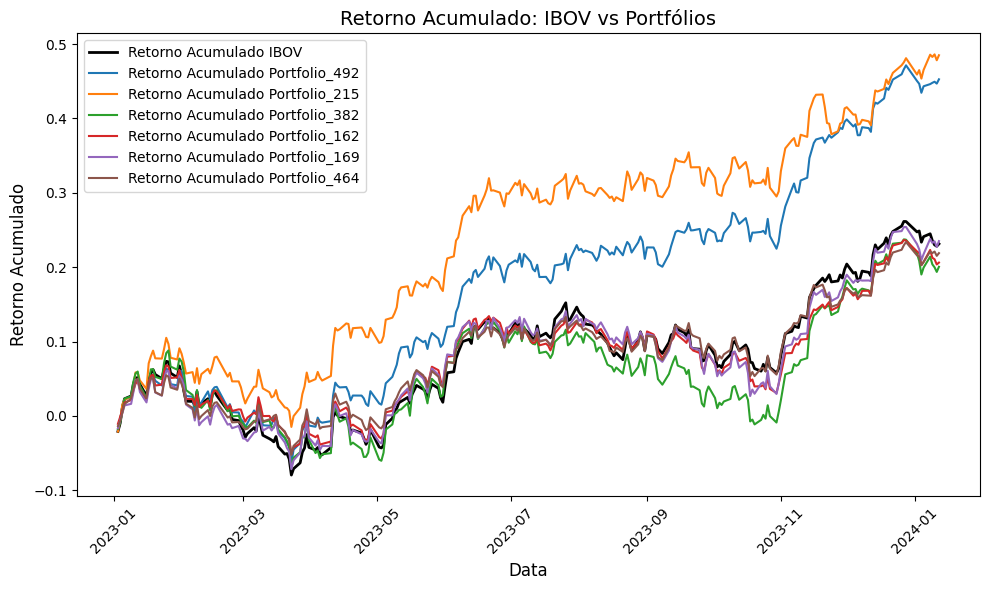

In [138]:
import matplotlib.pyplot as plt

# Plotando os dados de Retorno Acumulado
plt.figure(figsize=(10, 6))

# Plotando o retorno acumulado do IBOV
plt.plot(df_result.index, df_result['Retorno Acumulado'], label='Retorno Acumulado IBOV', color='black', linewidth=2)

# Plotando os portfólios
for portfolio in df_result.columns[1:]:
    plt.plot(df_result.index, df_result[portfolio], label=f'Retorno Acumulado {portfolio}')

# Adicionando título e rótulos aos eixos
plt.title('Retorno Acumulado: IBOV vs Portfólios', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado', fontsize=12)

# Adicionando legenda
plt.legend()

# Rotacionando as datas para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## Comparação dos Sharpes

In [139]:
df.reset_index(inplace=True)
df_sharpes =df[df['index'].isin(lista_portfolios)]
df_sharpes


,index,Retorno Anualizado,Vol Anualizada,Sharpe
0,Portfolio_382,0.200547,0.203246,0.494707
1,Portfolio_162,0.206184,0.162821,0.652153
2,Portfolio_169,0.235073,0.187986,0.718528
3,Portfolio_464,0.218899,0.153851,0.772818
498,Portfolio_492,0.452590,0.160446,2.197566
499,Portfolio_215,0.484944,0.168972,2.278152


In [140]:
# Adicionar o Sharpe do IBOV no DataFrame
df_ibov = pd.DataFrame(list(dicio_ibov.items()), columns=['index', 'Sharpe'])

# Concatenar os dois DataFrames
df_combined = pd.concat([df_sharpes, df_ibov], ignore_index=True)
df_combined

,index,Retorno Anualizado,Vol Anualizada,Sharpe
0,Portfolio_382,0.200547,0.203246,0.494707
1,Portfolio_162,0.206184,0.162821,0.652153
2,Portfolio_169,0.235073,0.187986,0.718528
3,Portfolio_464,0.218899,0.153851,0.772818
4,Portfolio_492,0.452590,0.160446,2.197566
5,Portfolio_215,0.484944,0.168972,2.278152
6,IBOV,NaN,NaN,0.782056


/tmp/ipykernel_79476/2803282870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='index', y='Sharpe', data=df_combined, palette='crest')


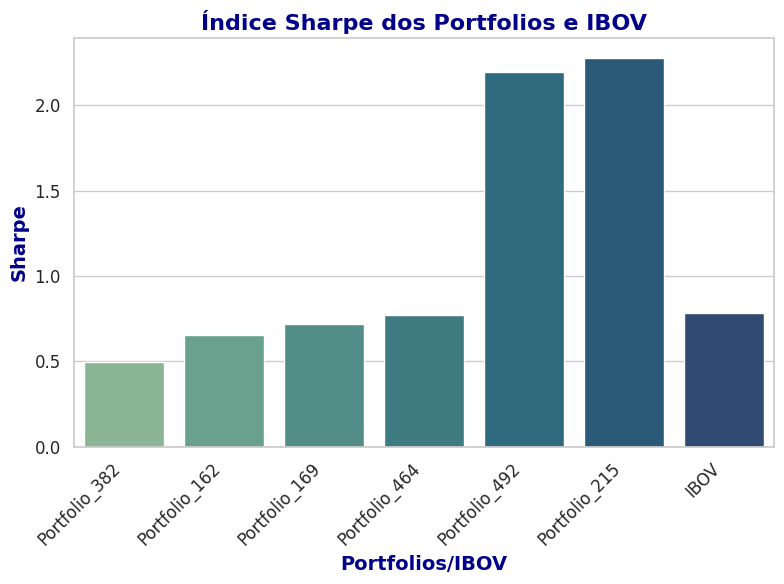

In [ ]:
import seaborn as sns


# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='index', y='Sharpe', data=df_combined, palette='crest')

# Personalizando o gráfico
plt.title('Índice Sharpe dos Portfolios e IBOV', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Portfolios/IBOV', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Sharpe', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Índice de Sortino

In [184]:
neg_std = df_portfolios[df_portfolios<=0 ].std() * np.sqrt(252)
df_sortino = (retorno_anualizado - free_risk_rate)/neg_std
df_sortino = pd.concat([retorno_anualizado, neg_std, df_sortino], axis=1)
df_sortino.columns = ['Retorno Anualizado', 'Vol Negativa Anualizada', 'Sortino']
df_sortino.index.name = 'index'
df_sortino.reset_index(inplace=True)
df_sortino



,index,Retorno Anualizado,Vol Negativa Anualizada,Sortino
0,Portfolio_1,0.403137,0.098752,3.069683
1,Portfolio_2,0.375543,0.098700,2.791708
2,Portfolio_3,0.362197,0.083294,3.147864
3,Portfolio_4,0.355735,0.104858,2.438873
4,Portfolio_5,0.276385,0.109891,1.605093
...,...,...,...,...
495,Portfolio_496,0.330603,0.097760,2.358879
496,Portfolio_497,0.290996,0.082498,2.315172
497,Portfolio_498,0.301782,0.089052,2.265887
498,Portfolio_499,0.396898,0.096686,3.070751


In [186]:

df_sortino = pd.merge(df, df_sortino, how="left", on='index')
df_sortino.head()


,index,Retorno Anualizado,Vol Anualizada_x,Sharpe_x,Retorno Anualizado_x,Vol Anualizada_y,Sharpe_y,Retorno Anualizado_y,Vol Negativa Anualizada,Sortino
0,Portfolio_382,0.200547,0.203246,0.494707,0.200547,0.203246,0.494707,0.200547,0.109426,0.918864
1,Portfolio_162,0.206184,0.162821,0.652153,0.206184,0.162821,0.652153,0.206184,0.086983,1.220744
2,Portfolio_169,0.235073,0.187986,0.718528,0.235073,0.187986,0.718528,0.235073,0.101942,1.325004
3,Portfolio_464,0.218899,0.153851,0.772818,0.218899,0.153851,0.772818,0.218899,0.083769,1.419367
4,Portfolio_281,0.223206,0.158132,0.779135,0.223206,0.158132,0.779135,0.223206,0.083870,1.469006


Index(['Retorno Anualizado', 'Vol Anualizada', 'Sharpe'], dtype='object')


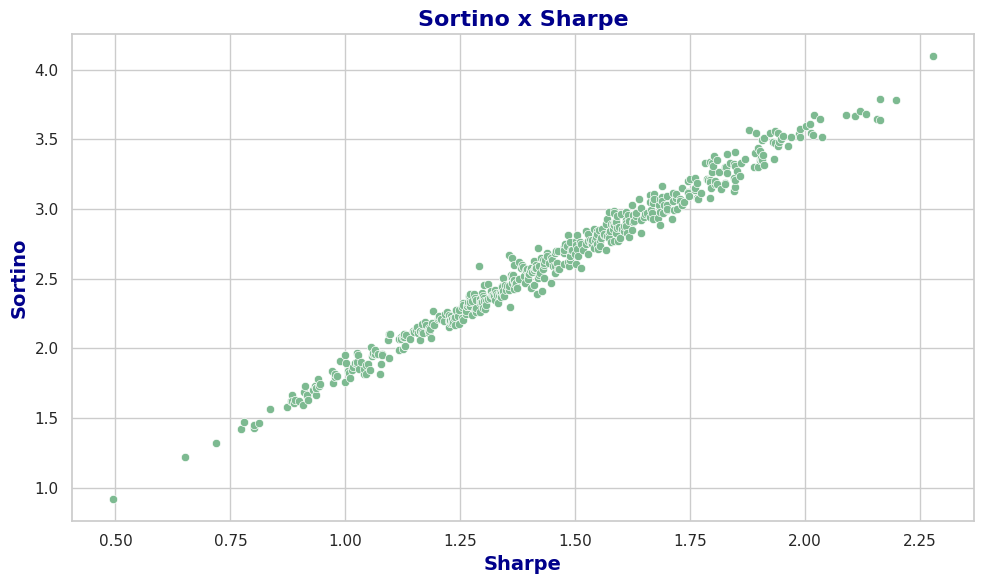

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificando as colunas do DataFrame
print(df.columns)

# Supondo que as colunas corretas sejam 'Sharpe_x' e 'Sortino', você deve usar:
plt.figure(figsize=(10, 6))

# Plotando o gráfico de dispersão com as colunas corretas
sns.scatterplot(x='Sharpe_x', y='Sortino', data=df_sortino)

# Personalizando o gráfico
plt.title('Sortino x Sharpe', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sharpe', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Sortino', fontsize=14, fontweight='bold', color='darkblue')

# Exibindo o gráfico
plt.tight_layout()
plt.show()
